In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [2]:
# Data collection and processing
car_dataset = pd.read_csv(r"C:\Users\15035\Downloads\ford.csv")

In [3]:
car_dataset.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


In [6]:
car_dataset.shape

(17966, 9)

In [7]:
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17966 entries, 0 to 17965
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17966 non-null  object 
 1   year          17966 non-null  int64  
 2   price         17966 non-null  int64  
 3   transmission  17966 non-null  object 
 4   mileage       17966 non-null  int64  
 5   fuelType      17966 non-null  object 
 6   tax           17966 non-null  int64  
 7   mpg           17966 non-null  float64
 8   engineSize    17966 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 1.2+ MB


In [9]:
car_dataset.describe()

,year,price,mileage,tax,mpg,engineSize
count,17966.000000,17966.000000,17966.000000,17966.000000,17966.000000,17966.000000
mean,2016.866470,12279.534844,23362.608761,113.329456,57.906980,1.350807
std,2.050336,4741.343657,19472.054349,62.012456,10.125696,0.432367
min,1996.000000,495.000000,1.000000,0.000000,20.800000,0.000000
25%,2016.000000,8999.000000,9987.000000,30.000000,52.300000,1.000000
50%,2017.000000,11291.000000,18242.500000,145.000000,58.900000,1.200000
75%,2018.000000,15299.000000,31060.000000,145.000000,65.700000,1.500000
max,2060.000000,54995.000000,177644.000000,580.000000,201.800000,5.000000


In [10]:
car_dataset.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [11]:
# checking distribution of categorical data


In [12]:
print(car_dataset.transmission.value_counts())

Manual       15518
Automatic     1361
Semi-Auto     1087
Name: transmission, dtype: int64


In [13]:
print(car_dataset.fuelType.value_counts())

Petrol      12179
Diesel       5762
Hybrid         22
Electric        2
Other           1
Name: fuelType, dtype: int64


In [14]:
# Encoding categorical Data

In [19]:
car_dataset.replace(
     {'transmission' :
      {'Manual':0,
       'Automatic':1,
       'Semi-Auto':2
      }
     },inplace=True)

In [46]:
car_dataset.replace({'fuelType':{'Petrol':0,'Diesel':1,'Hybrid':2,'Electric':3,'Other':4}},inplace=True)


In [47]:
car_dataset.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,1,15944,0,150,57.7,1.0
1,Focus,2018,14000,0,9083,0,150,57.7,1.0
2,Focus,2017,13000,0,12456,0,150,57.7,1.0
3,Fiesta,2019,17500,0,10460,0,145,40.3,1.5
4,Fiesta,2019,16500,1,1482,0,145,48.7,1.0


In [48]:
# splitting the data and target

In [49]:
X=car_dataset.drop(['model','price'],axis=1)
Y=car_dataset['price']

In [50]:
print(X)

       year  transmission  mileage  fuelType  tax   mpg  engineSize
0      2017             1    15944         0  150  57.7         1.0
1      2018             0     9083         0  150  57.7         1.0
2      2017             0    12456         0  150  57.7         1.0
3      2019             0    10460         0  145  40.3         1.5
4      2019             1     1482         0  145  48.7         1.0
...     ...           ...      ...       ...  ...   ...         ...
17961  2017             0    16700         0  150  47.1         1.4
17962  2014             0    40700         0   30  57.7         1.0
17963  2015             0     7010         1   20  67.3         1.6
17964  2018             0     5007         0  145  57.7         1.2
17965  2015             0     5007         0   22  57.7         1.0

[17966 rows x 7 columns]


In [51]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17966 entries, 0 to 17965
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          17966 non-null  int64  
 1   transmission  17966 non-null  int64  
 2   mileage       17966 non-null  int64  
 3   fuelType      17966 non-null  int64  
 4   tax           17966 non-null  int64  
 5   mpg           17966 non-null  float64
 6   engineSize    17966 non-null  float64
dtypes: float64(2), int64(5)
memory usage: 982.6 KB


In [52]:
print(Y)

0        12000
1        14000
2        13000
3        17500
4        16500
         ...  
17961     8999
17962     7499
17963     9999
17964     8299
17965     8299
Name: price, Length: 17966, dtype: int64


In [53]:
#splitting train and test data

In [54]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size = 0.1,random_state=2)

In [55]:
# Linear Regression

In [56]:
linear_reg=LinearRegression()

In [57]:
linear_reg.fit(X_train,Y_train)

LinearRegression()

In [58]:
training_data_prediction=linear_reg.predict(X_train)

In [59]:
# R square error

In [60]:
error_square=metrics.r2_score(Y_train,training_data_prediction)

In [61]:
print("R square Error : ",error_square)

R square Error :  0.7362461116182781


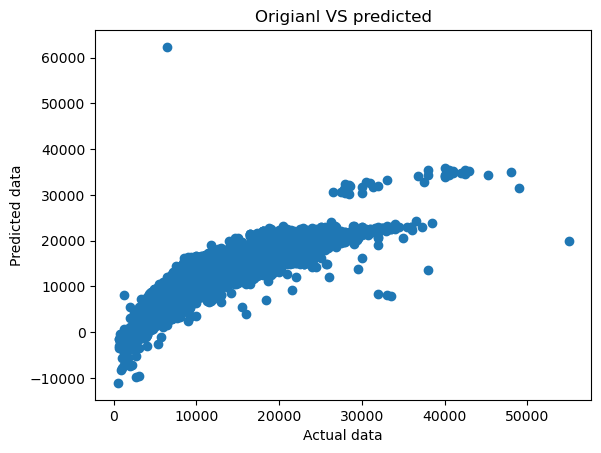

In [62]:
plt.scatter(Y_train,training_data_prediction)
plt.xlabel("Actual data")
plt.ylabel("Predicted data")
plt.title("Origianl VS predicted")
plt.show()

In [65]:
test_data_prediction=linear_reg.predict(X_test)

In [66]:
errr_square=metrics.r2_score(Y_test,test_data_prediction)

In [67]:
print("R squared Error : ",errr_square)

R squared Error :  0.7454233082811641


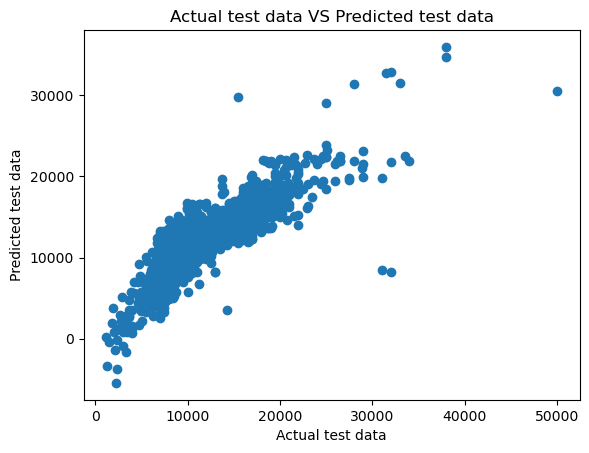

In [68]:
plt.scatter(Y_test,test_data_prediction)
plt.xlabel("Actual test data")
plt.ylabel("Predicted test data")
plt.title("Actual test data VS Predicted test data")
plt.show()

In [69]:
#Lasso

In [70]:
lass_reg=Lasso()

In [72]:
lass_reg.fit(X_train,Y_train)

Lasso()

In [73]:
lasso_train_predict=lass_reg.predict(X_train)

In [74]:
error_Lasso_square=metrics.r2_score(Y_train,lasso_train_predict)

In [75]:
print("R squared error : ",error_Lasso_square)

R squared error :  0.7362456959802445


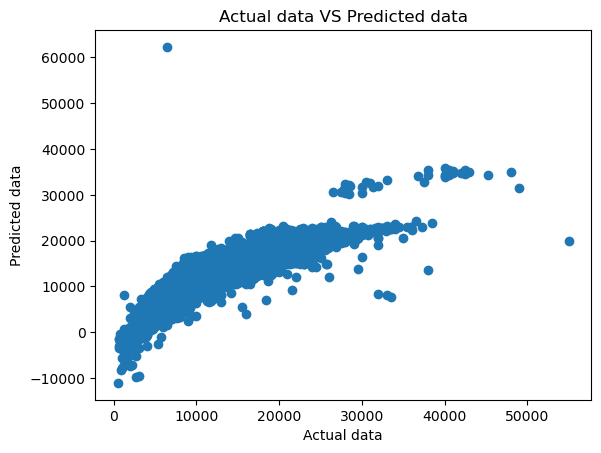

In [76]:
plt.scatter(Y_train,lasso_train_predict)
plt.xlabel("Actual data")
plt.ylabel("Predicted data")
plt.title("Actual data VS Predicted data")
plt.show()

In [77]:
test_data_prediction=lass_reg.predict(X_test)

In [78]:
errr_square=metrics.r2_score(Y_test,test_data_prediction)

In [79]:
print("R squared error : ",errr_square)

R squared error :  0.7453718962560336


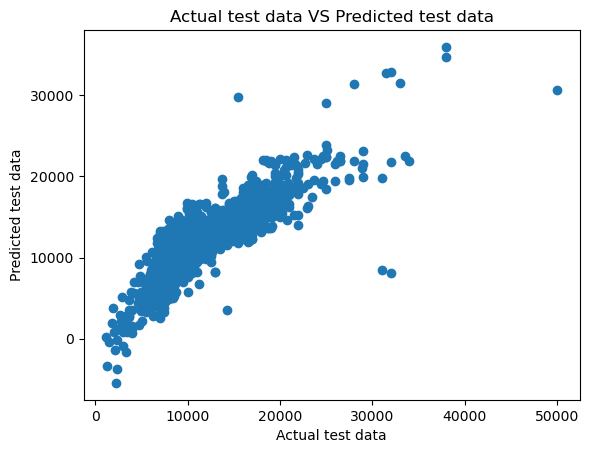

In [80]:
plt.scatter(Y_test,test_data_prediction)
plt.xlabel("Actual test data")
plt.ylabel("Predicted test data")
plt.title("Actual test data VS Predicted test data")
plt.show()

In [82]:
car_data_set = pd.read_csv(r"C:\Users\15035\Downloads\ford.csv")

In [83]:
car_data_set.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


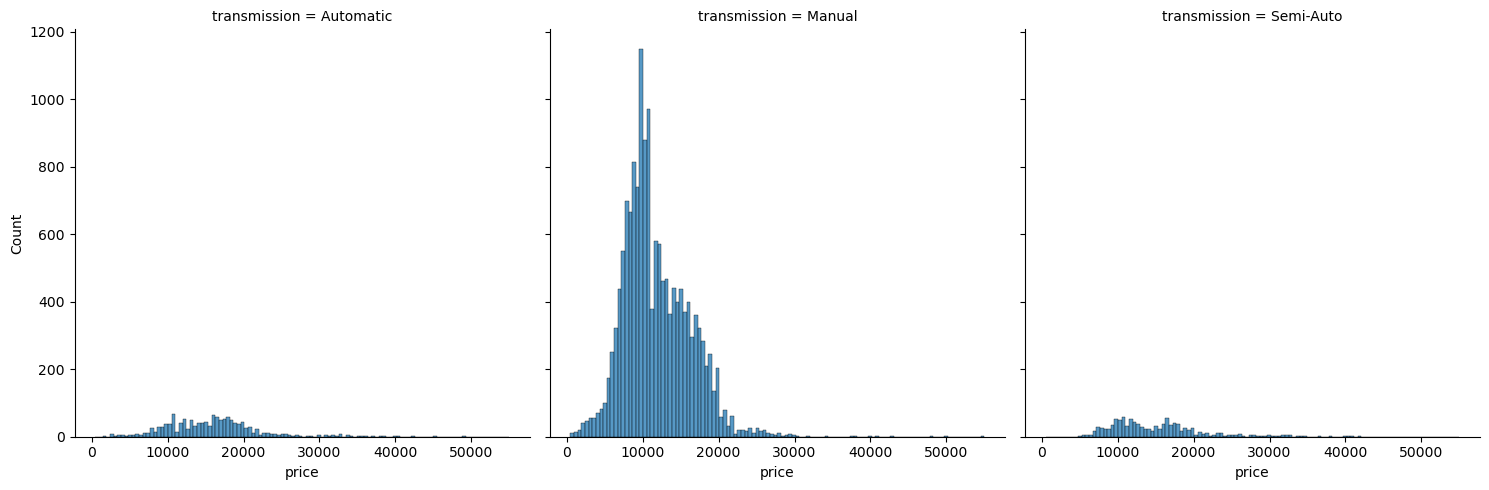

In [90]:
sns.displot(car_data_set,x='price',col='transmission',multiple="dodge")

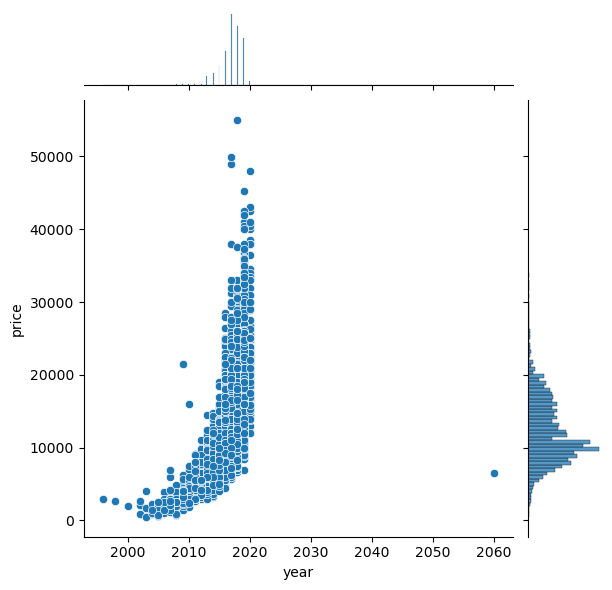

In [92]:
sns.jointplot(car_data_set,x='year',y='price')